## Kaggle Competition for Dogs/Cats Redux
https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [14]:
# Provides the inline interoperability with jupyter
%matplotlib inline

In [15]:
# Path for Kaggle data

path = "kdaggledata/"
#path = "kdaggledata/sample/"

# Additional Path validtions
results_path = path+"results/"
valid_path = path+"valid/"

    Kdaggle information is interesting

In [16]:
from __future__ import division,print_function

import os, sys, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint

Using Theano backend.


AttributeError: module 'theano' has no attribute 'tests'

In [12]:
## Need to add imp for the reload option
from imp import reload
import utils; reload(utils)
from utils import plots
from utils import *

AttributeError: module 'theano' has no attribute 'tests'

# Everything is setup

In [13]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=16

In [7]:
# Import our class, and instantiate
from keras import backend as theano
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Using Theano backend.


AttributeError: module 'theano' has no attribute 'tests'

In [6]:
#VGG is an image library that understands how to look at libraries
vgg = Vgg16()

NameError: name 'Vgg16' is not defined

In [11]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*4)
vgg.finetune(batches)
vgg.model.optimizer.lr = 0.1

Found 24600 images belonging to 2 classes.
Found 4920 images belonging to 2 classes.


In [12]:
#vgg.fit(batches, val_batches, nb_epoch=1)

In [13]:
#Setup the no of epochs and the latest weights
no_of_epochs = 1
latest_weights_filename = None

Trying to use the callaback function  to get the best weight

#Checkpoint
# http://machinelearningmastery.com/check-point-deep-learning-models-keras/
#checkfilepath="weights.best.hdf5"
#checkpoint = ModelCheckpoint(checkfilepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
#vgg.fit(batches, val_batches, nb_epoch=5, callbacks=callbacks_list, verbose=0)
print ("Lets have some fun now!")

In [14]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h7' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
    print ("Completed %s fit operations" % epoch)

Running epoch: 0
Epoch 1/1
 1664/24600 [=>............................] - ETA: 5586s - loss: 0.7374 - acc: 0.9477

KeyboardInterrupt: 

Old Functions

In [ ]:
latest_weights_filename
#vgg.finetune(batches)
#vgg.fit(batches, val_batches, nb_epoch=1)

In [12]:
#vgg.model.save_weights(path+'results/ft1.h5')

In [13]:
#Best model with .01 optimizer
vgg.model.load_weights(path+'results/ft4.h6')
latest_weights_filename = 'ft4.h6'

In [12]:
#vgg.model.load_weights(path+'results/ft1.h5.30')

## FineTuning

Conducts fine-tuning keeps those layers that contain useful features for our model, and updates the weights of those layers that are less suitable. http://course.fast.ai/lessons/lesson2.html

In [13]:
#sets up the model path. Imports bcolz to use later
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)
import bcolz
model = vgg.model

In [14]:
#batchsize 16 seems to be the best one
batch_size=4

In [15]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [16]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
val_batches = get_batches(path+'valid', shuffle=False, batch_size=1)
batches = get_batches(path+'train', shuffle=False, batch_size=1)

Found 4920 images belonging to 2 classes.
Found 24600 images belonging to 2 classes.


In [17]:
# Imports bcolz so that array can be easily save to save time.
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()

In [18]:
#Start loading from here
def load_array(fname): return bcolz.open(fname)[:]

In [19]:
# SKIP This
#Gets all of the Data
val_data = get_data(path+'valid')
trn_data = get_data(path+'train')

Found 4920 images belonging to 2 classes.
Found 24600 images belonging to 2 classes.


In [20]:
#train new Array
trn_data.shape

(24600, 3, 224, 224)

In [21]:
#Save the new array
save_array(model_path+ 'train_data.bc', trn_data)
save_array(model_path + 'valid_data.bc', val_data)

In [22]:
#Start load from here
trn_data = load_array(model_path+'train_data.bc')
val_data = load_array(model_path+'valid_data.bc')

In [23]:
#Double checks the shape of val
val_data.shape

(4920, 3, 224, 224)

In [24]:
# Defines the hotshot
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [25]:
#Creates the hotshots
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [26]:
# train the newest hotshot
trn_labels.shape

(24600, 2)

In [27]:
#try trn_class
trn_classes[:4]

array([0, 0, 0, 0], dtype=int32)

In [28]:
trn_labels[:4]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [29]:
#Pulls information in from imagenet
# SKIP THIS If you have it already
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)

In [30]:
save_array(model_path+ 'train_lastlayer_features.bc', trn_features)
save_array(model_path + 'valid_lastlayer_features.bc', val_features)

In [31]:
# Load from here
trn_features = load_array(model_path+'train_lastlayer_features.bc')
val_features = load_array(model_path+'valid_lastlayer_features.bc')

In [32]:
trn_features.shape

(24600, 1000)

In [33]:
# 1000 inputs, 
#since that's the saved features, and 2 outputs, 
#for dog and cat
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
#set up batchsize again
batch_size=8

In [35]:
#run fit
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 24600 samples, validate on 4920 samples
Epoch 1/3
24600/24600 [==============================] - 1s - loss: 0.1167 - acc: 0.9705 - val_loss: 0.1254 - val_acc: 0.9748
Epoch 2/3
24600/24600 [==============================] - 1s - loss: 0.1379 - acc: 0.9744 - val_loss: 0.1473 - val_acc: 0.9760
Epoch 3/3
24600/24600 [==============================] - 1s - loss: 0.1483 - acc: 0.9750 - val_loss: 0.1591 - val_acc: 0.9760


In [36]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_8 (Dense)                  (None, 2)             2002        dense_input_1[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [37]:
vgg.model.save_weights(path+'results/finetune1.h5')

In [38]:
vgg.model.load_weights(path+'results/finetune1.h5')

## Training more layers

In [39]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [40]:
lm = Sequential([ Dense(2, activation='softmax', input_shape=(1000,)) ])

In [41]:
# Adds a Dense layer to the model; Layers are additional functions
model.add(Dense(4096, activation='relu'))

In [42]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [43]:
#removes a layer
model.pop()
for layer in model.layers: layer.trainable=False

In [44]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [45]:
#Places softmax into the model; Softmax gets the max value
model.add(Dense(2, activation='softmax'))

In [46]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [47]:
gen=image.ImageDataGenerator()
# shuffle
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)

In [48]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=batches.n, nb_epoch=nb_epoch, 
                        validation_data=val_batches, nb_val_samples=val_batches.n)

In [61]:
opt = RMSprop(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
fit_model(model, batches, val_batches, nb_epoch=5)

Epoch 1/5
24592/24600 [============================>.] - ETA: 0s - loss: 0.1244 - acc: 0.9719

ValueError: output of generator should be a tuple (x, y, sample_weight) or (x, y). Found: [[[[ 253.  253.  253. ...,  243.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   ..., 
   [ 255.  255.  254. ...,  253.  254.  254.]
   [ 255.  255.  254. ...,  253.  254.  254.]
   [ 254.  254.  254. ...,  250.  254.  254.]]

  [[ 253.  253.  253. ...,  243.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   ..., 
   [ 252.  252.  253. ...,  253.  254.  254.]
   [ 252.  252.  253. ...,  253.  254.  254.]
   [ 253.  253.  253. ...,  250.  254.  254.]]

  [[ 253.  253.  253. ...,  243.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   [ 253.  253.  253. ...,  255.  254.  254.]
   ..., 
   [ 251.  251.  251. ...,  251.  252.  252.]
   [ 251.  251.  251. ...,  251.  252.  252.]
   [ 251.  251.  251. ...,  248.  252.  252.]]]


 [[[ 158.  153.  158. ...,  183.  182.  187.]
   [ 159.  158.  161. ...,  184.  183.  188.]
   [ 157.  156.  155. ...,  187.  187.  185.]
   ..., 
   [ 149.  154.  144. ...,  196.  197.  196.]
   [ 148.  153.  142. ...,  198.  199.  199.]
   [ 147.  153.  145. ...,  200.  201.  202.]]

  [[ 153.  151.  157. ...,  180.  179.  181.]
   [ 156.  155.  160. ...,  181.  180.  182.]
   [ 154.  155.  154. ...,  186.  186.  181.]
   ..., 
   [ 139.  148.  142. ...,  180.  181.  180.]
   [ 138.  147.  140. ...,  182.  183.  183.]
   [ 137.  147.  143. ...,  184.  185.  186.]]

  [[ 159.  156.  162. ...,  173.  172.  183.]
   [ 163.  162.  166. ...,  176.  173.  184.]
   [ 163.  163.  162. ...,  181.  181.  182.]
   ..., 
   [ 140.  150.  145. ...,  154.  155.  147.]
   [ 139.  149.  143. ...,  156.  157.  150.]
   [ 138.  149.  146. ...,  158.  159.  153.]]]


 [[[ 124.  124.  124. ...,   79.   80.   81.]
   [ 124.  124.  124. ...,   79.   80.   81.]
   [ 125.  125.  125. ...,   79.   80.   81.]
   ..., 
   [ 166.  166.  168. ...,   72.   73.   74.]
   [ 165.  162.  163. ...,   74.   74.   75.]
   [ 164.  158.  158. ...,   76.   75.   76.]]

  [[ 106.  106.  106. ...,   90.   91.   92.]
   [ 106.  106.  106. ...,   90.   91.   92.]
   [ 107.  107.  107. ...,   90.   91.   92.]
   ..., 
   [ 175.  175.  177. ...,   82.   83.   84.]
   [ 175.  172.  173. ...,   84.   84.   85.]
   [ 174.  168.  168. ...,   86.   85.   86.]]

  [[  84.   84.   84. ...,   92.   93.   94.]
   [  84.   84.   84. ...,   92.   93.   94.]
   [  85.   85.   85. ...,   92.   93.   94.]
   ..., 
   [ 180.  180.  182. ...,   81.   82.   83.]
   [ 184.  181.  182. ...,   83.   83.   84.]
   [ 184.  178.  178. ...,   85.   84.   85.]]]


 ..., 
 [[[ 199.  198.  197. ...,  172.  177.  177.]
   [ 199.  199.  198. ...,  179.  180.  180.]
   [ 200.  199.  199. ...,  176.  177.  177.]
   ..., 
   [ 167.  174.  166. ...,  134.  129.  123.]
   [ 168.  170.  172. ...,  137.  121.  114.]
   [ 166.  165.  153. ...,  138.  137.  130.]]

  [[ 197.  196.  195. ...,  166.  171.  171.]
   [ 197.  197.  196. ...,  173.  174.  174.]
   [ 198.  197.  197. ...,  170.  171.  171.]
   ..., 
   [ 136.  145.  140. ...,  112.  102.   96.]
   [ 140.  143.  146. ...,  117.   94.   87.]
   [ 139.  139.  128. ...,  118.  108.  101.]]

  [[ 200.  199.  198. ...,  170.  175.  175.]
   [ 200.  200.  199. ...,  177.  178.  178.]
   [ 201.  200.  200. ...,  174.  175.  175.]
   ..., 
   [ 108.  115.  105. ...,   89.   83.   77.]
   [ 118.  116.  113. ...,   93.   75.   68.]
   [ 118.  114.   97. ...,   94.   90.   83.]]]


 [[[ 245.  249.  240. ...,  238.  239.  245.]
   [ 246.  248.  237. ...,  241.  243.  249.]
   [ 254.  253.  239. ...,  241.  246.  252.]
   ..., 
   [ 147.  143.  129. ...,  114.   89.   32.]
   [ 110.  114.  115. ...,  115.   87.   31.]
   [  63.   72.   81. ...,  118.   84.   28.]]

  [[ 242.  246.  237. ...,  241.  242.  248.]
   [ 243.  245.  234. ...,  244.  246.  252.]
   [ 251.  250.  236. ...,  244.  249.  255.]
   ..., 
   [ 143.  139.  125. ...,  113.   88.   31.]
   [ 106.  110.  111. ...,  114.   86.   30.]
   [  57.   66.   75. ...,  117.   83.   27.]]

  [[ 237.  241.  232. ...,  248.  249.  255.]
   [ 238.  240.  229. ...,  251.  253.  255.]
   [ 246.  245.  231. ...,  251.  255.  255.]
   ..., 
   [ 144.  140.  126. ...,  109.   84.   27.]
   [ 107.  111.  112. ...,  110.   82.   26.]
   [  59.   68.   77. ...,  113.   79.   23.]]]


 [[[  28.   22.   25. ...,  158.  158.  155.]
   [  26.   21.   23. ...,  159.  159.  158.]
   [  25.   19.   22. ...,  160.  161.  160.]
   ..., 
   [ 124.  125.  143. ...,  146.  145.  145.]
   [ 113.  117.  136. ...,  146.  145.  143.]
   [ 111.  113.  129. ...,  144.  142.  140.]]

  [[  24.   18.   21. ...,  138.  138.  135.]
   [  22.   17.   19. ...,  139.  139.  138.]
   [  21.   15.   18. ...,  140.  141.  140.]
   ..., 
   [ 117.  118.  136. ...,   86.   85.   85.]
   [ 108.  113.  132. ...,   86.   85.   83.]
   [ 106.  109.  125. ...,   84.   82.   80.]]

  [[  12.    6.    9. ...,  105.  105.  102.]
   [  10.    5.    7. ...,  106.  106.  105.]
   [   9.    3.    6. ...,  107.  108.  107.]
   ..., 
   [ 111.  112.  130. ...,   52.   51.   51.]
   [ 102.  104.  120. ...,   52.   51.   49.]
   [ 100.  100.  113. ...,   50.   48.   46.]]]]

In [55]:
model.save_weights(model_path+'DiffModfinetune3.h5')

In [63]:
model.load_weights(model_path+'DiffModfinetune1.h5')

# DiffModfinetune1.h5'
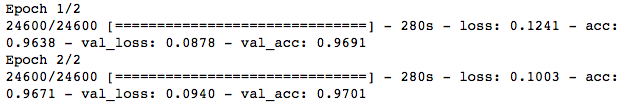
# DiffNidfubetune2,h5
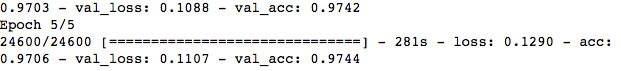

In [ ]:
model.evaluate(val_data, val_labels)

## Building Submission File

How I build the submit file for kaggle.

In [18]:
#Ensure that you have a testset fed into batches and preds
batches, preds = vgg.test(path+'test', batch_size = batch_size*2)
filenames = batches.filenames

Found 12500 images belonging to 1 classes.


In [19]:
#Test that you can get the predictions AND the files
preds[:5]
filenames[:5]

['test/7807.jpg',
 'test/6818.jpg',
 'test/8924.jpg',
 'test/5985.jpg',
 'test/5468.jpg']

In [20]:
#Save arrays with both predictions and filenames
save_array(path+'results/' + 'test_preds.dat', preds)
save_array(path+'results/' + 'filenames.dat', filenames)

In [21]:
#Load both arrays into variables
preds= load_array(path+'results/' + 'test_preds.dat')
filenames = load_array(path+'results/' + 'filenames.dat')

In [22]:
#Test the Variable
filenames[:5]

array(['test/7807.jpg', 'test/6818.jpg', 'test/8924.jpg', 'test/5985.jpg', 'test/5468.jpg'], 
      dtype='<U14')

In [23]:
#Test Image opens a dog
from PIL import Image
#Image.open(path+filenames[0])

In [24]:
#Assigns predictions to isdog
isdog= preds[:,1]

In [25]:
#We dont use clip and use something else later
#isdog = isdog.clip(min=0.01, max=0.99)
isdog[:5]

array([ 1.,  1.,  1.,  1.,  1.], dtype=float32)

In [26]:
#ids = np.array([int(f[(f.find('.')):(f.find('.jpg'))]) for f in filenames])
ids = (np.array(f for f in filenames))

In [27]:
# From the np.array cuts the filenames down to just numbers
ids = np.array([int(f[(f.find('/')+1):f.find('.jpg')]) for f in filenames])
#Test
ids[:5]

array([7807, 6818, 8924, 5985, 5468])

In [28]:
isadog= isdog
for n,i in enumerate(isadog):
    if 0.3<i<0.7:
        isadog[n]=i
    elif .95<i:
        isadog[n]=.99
    elif .05>i:
        isadog[n]=.01
subm = np.stack([ids,isadog], axis=1)
#Test
subm[:5]

array([[  7.8070e+03,   9.9000e-01],
       [  6.8180e+03,   9.9000e-01],
       [  8.9240e+03,   9.9000e-01],
       [  5.9850e+03,   9.9000e-01],
       [  5.4680e+03,   9.9000e-01]])

In [29]:
print ("Raw Predictions: " + str(isadog[:5]))
print ("Mid Predictions: " + str(len(isadog[(isdog < .6) & (isdog > .4)])))
print ("Edge Predictions: " + str(isadog[(isdog == 1) | (isdog == 0)]))

Raw Predictions: [ 0.99  0.99  0.99  0.99  0.99]
Mid Predictions: 4
Edge Predictions: []


# Submission Generation
Create the array in the Kaggle Format. Choose your submission name below.

In [31]:
submission_file_name = path+'submission9.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [32]:
from IPython.display import FileLink
FileLink(submission_file_name)

/home/jd/nbs/kdaggledata/submission9.csv

https://www.kaggle.com

# Validate Predictions
Keras' fit() function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("epoch" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting.

Tip: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).
As well as looking at the overall metrics, it's also a good idea to look at examples of each of:

1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

## Setup

In [14]:
#vgg.model.load_weights(results_path+latest_weights_filename)
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 4920 images belonging to 2 classes.


In [15]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [16]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

[[2435   25]
 [  16 2444]]


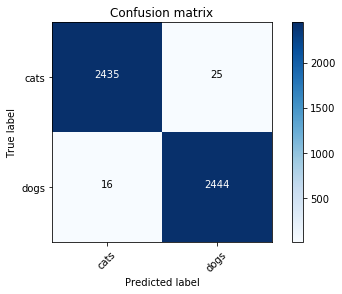

In [17]:
# See a confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)
plot_confusion_matrix(cm, val_batches.class_indices)

## 1. A few correct labels at random

In [ ]:
correct = np.where(our_labels==expected_labels)[0]
print ("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

## 2. A few incorrect labels at random

In [ ]:
incorrect = np.where(our_labels!=expected_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

## 3. The images we most confident were X, and are actually X

Found 2368 confident correct cats labels


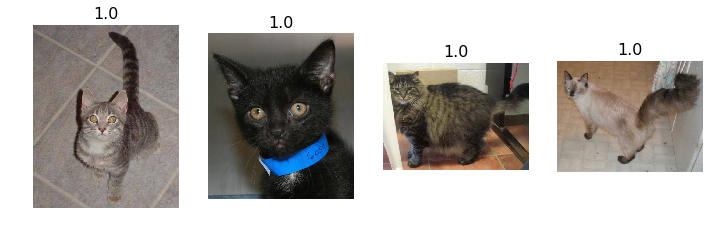

In [92]:
# Most confident they are cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print ("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 2403 confident correct dogs labels


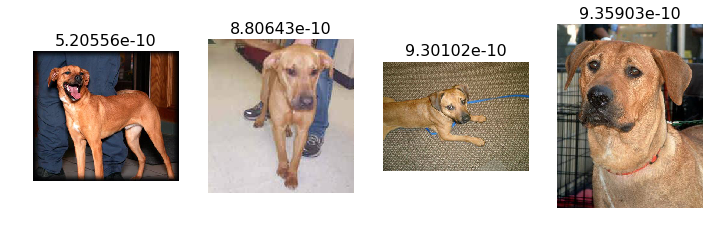

In [93]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print ("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

## 4. The images we most confident were X, and are actually Y

Found 57 incorrect cats


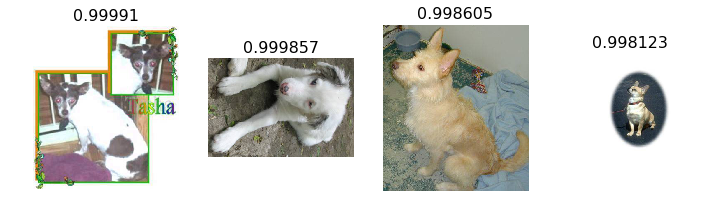

In [94]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 92 incorrect dogs


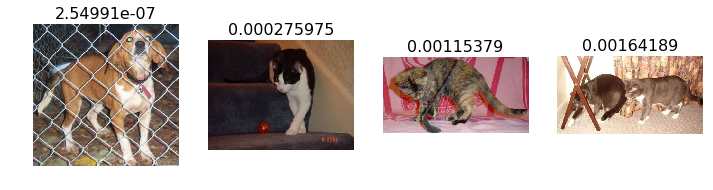

In [95]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect dogs" % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

## 5. The most uncertain images

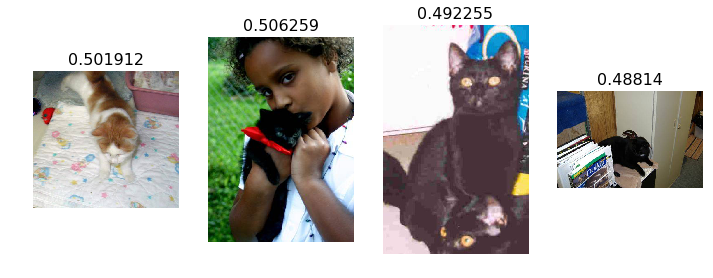

In [96]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

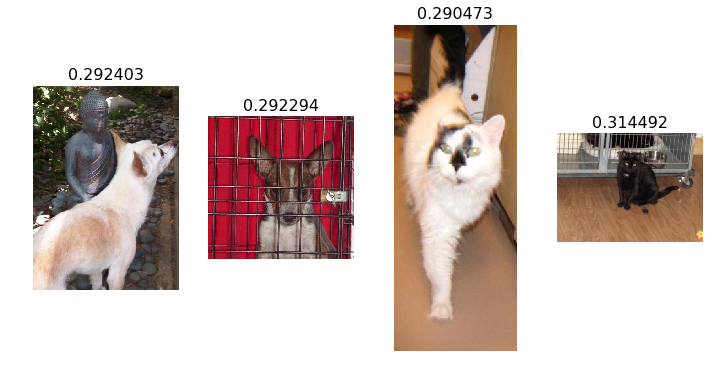

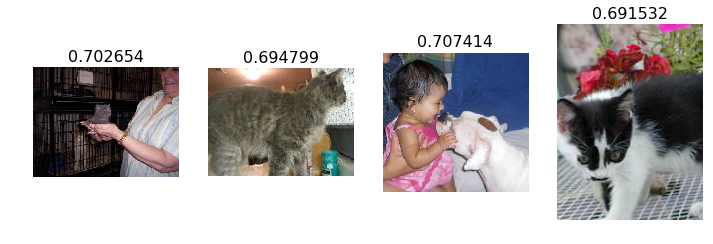

In [101]:
#5a. The most uncertain labels (ie those with probability closest to 0.3-.7).
most_uncertain_a = np.argsort(np.abs(our_predictions-0.3))
most_uncertain_b = np.argsort(np.abs(our_predictions-0.7))
plots_idx(most_uncertain_a[:n_view], our_predictions[most_uncertain_a])
plots_idx(most_uncertain_b[:n_view], our_predictions[most_uncertain_b])